# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

data = pd.read_excel('geo_comment.xlsx', index_col=0)  
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=60)


In [3]:
# data = data.head(1)

In [4]:
X = data[['x','y']]
y = data[['comment_class']]

In [5]:
y



,comment_class
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
70377,-1
70378,-1
70379,1
70380,-1


In [6]:
y['comment_class'] = np.where(y['comment_class'] < 0, 0, y['comment_class'])

<ipython-input-6-6db56e301457>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['comment_class'] = np.where(y['comment_class'] < 0, 0, y['comment_class'])


In [7]:
y1 = y.to_records(index=False)

In [8]:
y1

rec.array([(0,), (0,), (0,), ..., (1,), (0,), (0,)],
          dtype=[('comment_class', '<i8')])

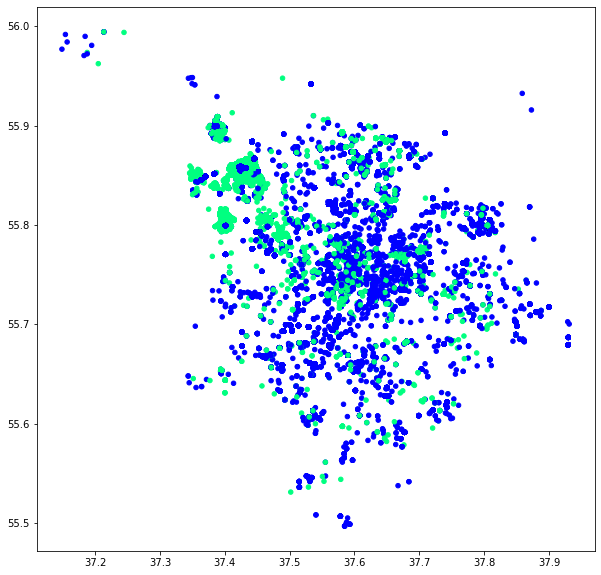

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(X['x'], X['y'], c=y1,cmap='winter', s=20)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X_scaled = scaler.fit_transform(X)


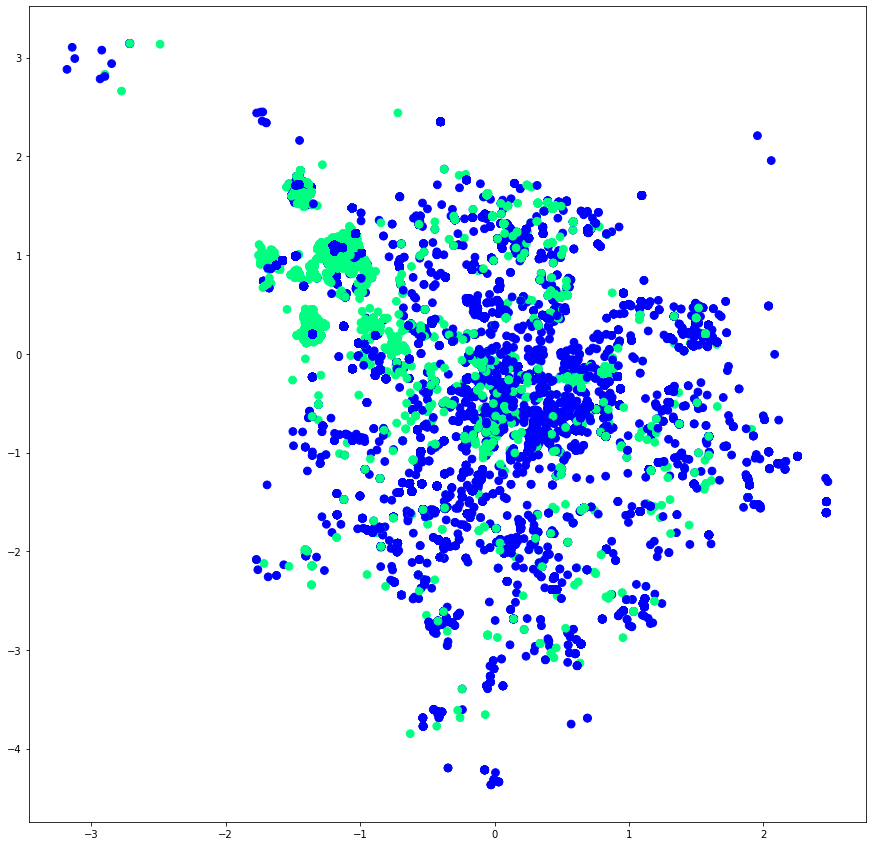

In [13]:
plt.figure(figsize=(15,15))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y1,cmap='winter', s=60)

In [14]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [15]:
algorithms = [
    #AffinityPropagation(),
    #KMeans(n_clusters=2),
    #AgglomerativeClustering(n_clusters=2),
    DBSCAN()
]

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [175]:
def get_descr(algo_name, y, y_pred, X):
    return "{}\nARI {:.2f}\nSilhouette {:.2f}".format(
        algo_name,
        adjusted_rand_score(y, y_pred),
        silhouette_score(X, y_pred)
    )

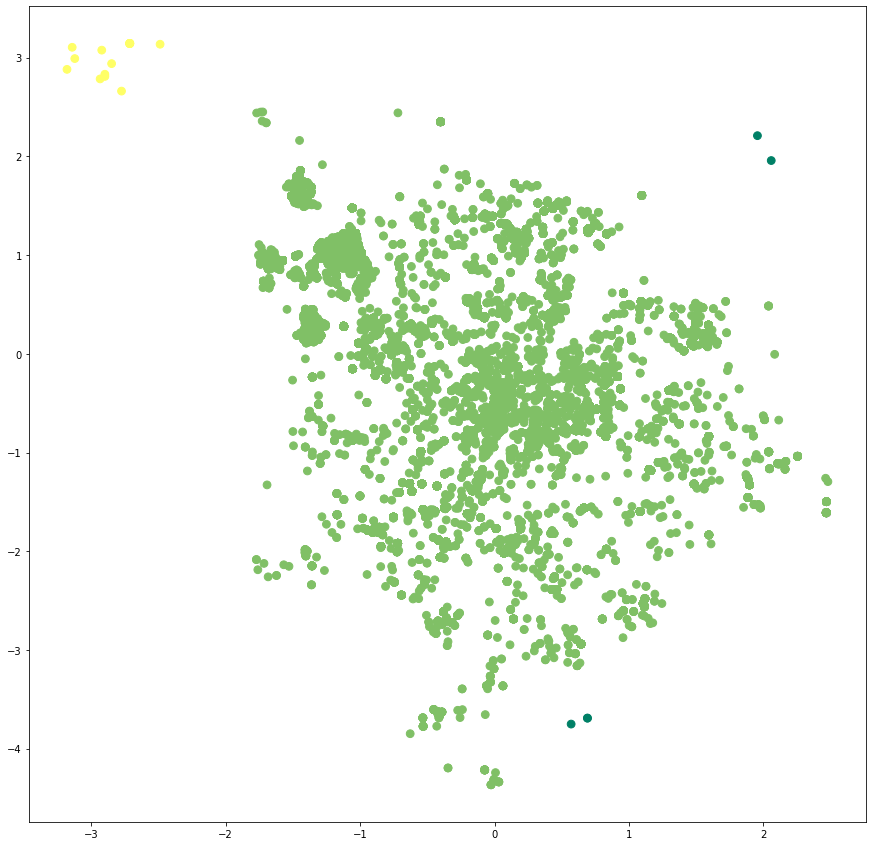

In [17]:
algorithm = DBSCAN()
clusters = algorithm.fit_predict(X_scaled)
plt.figure(figsize=(15,15))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters,cmap='summer', s=60)

In [163]:
(unique, counts) = np.unique(clusters, return_counts=True)

In [164]:
frequencies = np.asarray((unique, counts)).T

In [165]:
print(frequencies)

[[   -1     5]
 [    0 70361]
 [    1    16]]
